#Full DL Solution

© 2024, Zaka AI, Inc. All Rights Reserved.

---

###**Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# Changing the working directory
%cd /content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module4

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module4


#Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [ ]:
#reading the csv file and printing the head
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

First, you need to know the shape of our data (How many examples and features do we have)

In [ ]:
#Getting the data shape
rows = stroke_df.shape[0]
columns = stroke_df.shape[1]
print("The dataset has {} rows and {} columns.".format(rows, columns))

The dataset has 5110 rows and 12 columns.


###Types of different Columns

See the type of each of your features and see if you have any nulls

In [ ]:
# Checking the type of each column
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Checking for null values
stroke_df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

In [ ]:
# Checking for the categories the counts of each of them

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Walk through each categorical variable
for col in categorical_columns:
    print("Column: {}".format(col))
    print(stroke_df[col].value_counts())
    print("\n")

Column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


Column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


Column: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64




#Preprocessing

Prepare the data in a way to be ready to be used to train a DL model.

In [ ]:
# ----------------------------- Preprocessing for categorical columns  ----------------------------- #

# dropping the 1 'Other' type in gender column
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

# Encoding categorical data (multi)
stroke_df = pd.get_dummies(stroke_df, columns=['work_type', 'smoking_status'], drop_first=False, dtype=np.uint8)

# Encoding categorical data (binary)
stroke_df['gender'] = stroke_df['gender'].map({'Male': 1, 'Female': 0})
stroke_df['ever_married'] = stroke_df['ever_married'].map({'Yes': 1, 'No': 0})
stroke_df['Residence_type'] = stroke_df['Residence_type'].map({'Urban': 1, 'Rural': 0})

stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# --------------------------- Preprocessing for numerical columns  ----------------------------- #

# First, I have to deal with 201 null bmi values:
stroke_df['bmi'].describe()

,bmi
count,4908.00000
mean,28.89456
std,7.85432
min,10.30000
25%,23.50000
50%,28.10000
75%,33.10000
max,97.60000


<Axes: xlabel='bmi', ylabel='Count'>

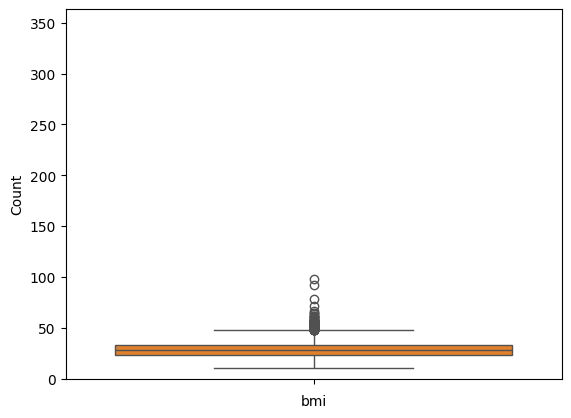

In [ ]:
# Plotting the distribution of bmi column + a box and wisker plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(stroke_df['bmi'], kde = True)
sns.boxplot(stroke_df['bmi'])

In [ ]:
# Filling the null entries with the median since the bmi data is potively skewed
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)

stroke_df.head()

<ipython-input-38-5e4cb3b77aa5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# Normalizing all numerical columns using
from sklearn.preprocessing import MinMaxScaler

# Using the MinMax Scaler
scaler = MinMaxScaler()

numerical_features = ['age', 'avg_glucose_level', 'bmi']
stroke_df[numerical_features] = scaler.fit_transform(stroke_df[numerical_features])

# Verify the transformation
print(stroke_df[numerical_features].describe())

               age  avg_glucose_level          bmi
count  5109.000000        5109.000000  5109.000000
mean      0.526733           0.235529     0.212638
std       0.276045           0.209053     0.088199
min       0.000000           0.000000     0.000000
25%       0.304199           0.102114     0.154639
50%       0.548340           0.169698     0.203895
75%       0.743652           0.272228     0.257732
max       1.000000           1.000000     1.000000


In [ ]:
stroke_df = stroke_df.drop(columns=['id'])
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.301260,1,0,0,1,0,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,0.203895,1,0,0,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.254296,1,0,0,1,0,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.276060,1,0,0,1,0,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.156930,1,0,0,0,1,0,0,0,1,0


#Building the DL Model

Now it's time to build the actual model. Propose a DL architecture suitable for this problem and print its summary.

In [ ]:
#Building a functional Keras model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

x = stroke_df.drop(columns=['stroke']) # dividing into input/output to get feature number (increased after one hot encoding)
y = stroke_df['stroke']

# Defining input layer
input_layer = Input(shape=(x.shape[1],))

# Hidden layer
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Creating the model
model = Model(inputs=input_layer, outputs=output_layer)

# printing model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

###Compiling the model

Now we need to compile the model.

In [ ]:
#Compiling the model with adam optimizer and binary crossentorpy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###Fitting the model

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the data (30% - test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

history = model.fit(x_train, y_train, epochs=20, batch_size=32)

y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9504 - loss: 0.1429
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1313
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9549 - loss: 0.1343
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9593 - loss: 0.1223
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9599 - loss: 0.1183
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9614 - loss: 0.1186
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1185
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9519 - loss: 0.1393
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1349
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1329
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1401
Epoch 12/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

What can you deduce from the results you obtained?

**The classification report shows an accuracy of 94%, which is misleading as it is clear that there is an imbalance in the dataset, as the support column suggests. Also, perceision, recall and f1-score for a predection of 1 (storke) is very low compared to 0 (no stroke).**

#Improving DL Models

**TIP: When tuning your model to obtain a better performance, make sure you use a validation set**

###Data Improvement

After having studied your data in previous parts, enhance the performance of your model with one data improvement using **SMOTE**.

In [ ]:
# Addressing data imbalance SMOTE
from imblearn.over_sampling import SMOTE

x = stroke_df.drop(columns=['stroke'])
y = stroke_df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE (training):", y_train_resampled.value_counts())

Class distribution after SMOTE (training): stroke
0    3416
1    3416
Name: count, dtype: int64


In [ ]:
# Building the model again
input_layer = Input(shape=(x_train_resampled.shape[1],))

hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)

output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

model = Model(inputs=input_layer, outputs=output_layer)


model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_resampled, y_train_resampled,epochs=20,batch_size=32,
                    validation_split=0.2  # 20% of the training data for validation
                    )

# Predicting on the test set
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Step 8: Evaluate the model
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_binary))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6313 - loss: 0.6262 - val_accuracy: 0.5304 - val_loss: 0.7504
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.4429 - val_accuracy: 0.8332 - val_loss: 0.4435
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.3868 - val_accuracy: 0.8413 - val_loss: 0.4032
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3749 - val_accuracy: 0.7542 - val_loss: 0.5337
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.3702 - val_accuracy: 0.9086 - val_loss: 0.3067
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.3742 - val_accuracy: 0.8025 - val_loss: 0.4652
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3539 - val_accuracy: 0.8171 - val_loss: 0.4611
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.3528 - val_accuracy: 0.

Comment the performance you obtained

**The accuracy decreased,and percision for predicting class 1 is even lower now, all scores for class 0 are still significatly higher than class 1.**

###Model Design

Propose one model design method to improve the performance of your model even more.

In [ ]:
# I will try bacth normalization
from tensorflow.keras.layers import BatchNormalization

input_layer = Input(shape=(x_train_resampled.shape[1],))

# First hidden layer with batch normalization
hidden_layer1 = Dense(64, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(hidden_layer1)

# Second hidden layer with batch normalization
hidden_layer2 = Dense(32, activation='relu')(batch_norm1)
batch_norm2 = BatchNormalization()(hidden_layer2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(batch_norm2)


model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2)

y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_binary))


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6907 - loss: 0.5886 - val_accuracy: 0.1851 - val_loss: 0.8980
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8126 - loss: 0.4031 - val_accuracy: 0.6496 - val_loss: 0.6366
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8272 - loss: 0.3754 - val_accuracy: 0.7520 - val_loss: 0.5213
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.3587 - val_accuracy: 0.7915 - val_loss: 0.4563
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3515 - val_accuracy: 0.8288 - val_loss: 0.4264
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.3538 - val_accuracy: 0.8442 - val_loss: 0.3678
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.3241 - val_accuracy: 0.8873 - val_loss: 0.2932
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3113 - val_accuracy: 0.

Comment the performance of your model

**The results do not defer much, accuracy is 84%. Persision, recall and f1 score are still higher for class 0.**

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model. Pick two hyperparameters to optimize, and run a grid search to optimize them. Then fit your model on the best parameters.

In [ ]:
# I will try tuning the number of nuerons and learning rate
def build_model(num_neurons, learning_rate):
    # Input layer
    input_layer = Input(shape=(x_train_resampled.shape[1],))

    # Hidden layers
    hidden_layer1 = Dense(num_neurons, activation='relu')(input_layer)
    hidden_layer2 = Dense(num_neurons // 2, activation='relu')(hidden_layer1)

    # Output layer
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)


    model = Model(inputs=input_layer, outputs=output_layer)


    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=5,           # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best weights
)

# Grid
param_grid = {
    'num_neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.0005, 0.0001]
}

best_params = None
best_val_accuracy = 0

for num_neurons in param_grid['num_neurons']:
    for learning_rate in param_grid['learning_rate']:
        print(f"Training with Neurons: {num_neurons}, Learning Rate: {learning_rate}")

        # Building and train the model
        model = build_model(num_neurons=num_neurons, learning_rate=learning_rate)
        history = model.fit(
            x_train_resampled, y_train_resampled,
            epochs=50,  # Allowing more epochs; EarlyStopping will stop early if needed
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],  # Adding EarlyStopping callback
            verbose=0  # Suppressing detailed logs for grid search
        )

        # Evaluating validation performance
        val_accuracy = max(history.history['val_accuracy'])
        print(f"Validation Accuracy: {val_accuracy:.4f}")

        # Saving best parameters
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_params = {'num_neurons': num_neurons, 'learning_rate': learning_rate}

print(f"Best Parameters: {best_params}, Best Validation Accuracy: {best_val_accuracy:.4f}")


Training with Neurons: 32, Learning Rate: 0.001
Validation Accuracy: 0.8296
Training with Neurons: 32, Learning Rate: 0.0005
Validation Accuracy: 0.7345
Training with Neurons: 32, Learning Rate: 0.0001
Validation Accuracy: 0.0417
Training with Neurons: 64, Learning Rate: 0.001
Validation Accuracy: 0.9049
Training with Neurons: 64, Learning Rate: 0.0005
Validation Accuracy: 0.8208
Training with Neurons: 64, Learning Rate: 0.0001
Validation Accuracy: 0.2963
Training with Neurons: 128, Learning Rate: 0.001
Validation Accuracy: 0.9239
Training with Neurons: 128, Learning Rate: 0.0005
Validation Accuracy: 0.8076
Training with Neurons: 128, Learning Rate: 0.0001
Validation Accuracy: 0.6832
Best Parameters: {'num_neurons': 128, 'learning_rate': 0.001}, Best Validation Accuracy: 0.9239


In [ ]:
final_model = build_model(num_neurons=best_params['num_neurons'], learning_rate=best_params['learning_rate'])

history = final_model.fit(
    x_train_resampled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluating Final Model on Test Data
y_pred = final_model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_binary))

Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6572 - loss: 0.6058 - val_accuracy: 0.2707 - val_loss: 1.0208
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4117 - val_accuracy: 0.7542 - val_loss: 0.5657
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3682 - val_accuracy: 0.8895 - val_loss: 0.3197
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.3648 - val_accuracy: 0.8683 - val_loss: 0.3581
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.3639 - val_accuracy: 0.8603 - val_loss: 0.3908
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.19      0.15      0.16        89

    accuracy                           0.91      1533
   macro avg       0.57      0.55      0.56      1533
weighted avg

Comment the performance of your model

**Accuracy increased, but the problem with precision, recall and f1-score for class 1 presists. It is as if the data imbalance has not been fixed.**